## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [6]:
import os
import keras

# 請嘗試設定 GPU：os.environ


In [7]:
train, test = keras.datasets.cifar10.load_data()

In [8]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = (x / 255.) * 2.0 - 1.0
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [9]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 64, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 64)                4160

In [11]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [12]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [13]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 225us/step - loss: 1.7531 - accuracy: 0.3753 - val_loss: 1.5827 - val_accuracy: 0.434350 - accuracy - ETA: 2s - loss: 1.7894 - accuracy: 0. - ETA: 2s - loss: 1.7871 - accuracy - ETA:  - ETA: 0s - loss: 1.7597 - accura - ETA: 0s - loss: 1.7543 - accuracy: 0.
Epoch 2/100
50000/50000 [==============================] - 11s 219us/step - loss: 1.5043 - accuracy: 0.4700 - val_loss: 1.4447 - val_accuracy: 0.4913s: 1.5292 - accura - ETA: 5s - loss: - ETA: 4s - loss: 1.5250 - accuracy: 0.46 - ETA: 4s - loss: 1.5235 - accuracy:  - ETA: 3s - loss: 1.5226 - accu - ETA: 3s - loss: 1.5203 - accuracy:  - ETA: 3s - loss: 1.5214 - accu - ETA: 3s - loss: 1.5196 - accuracy: 0. - ETA: 0s - loss: 1.5081 - accuracy: 0.46 - ETA: 0s - loss: 1.5078 - ac
Epoch 3/100
50000/50000 [==============================] - 11s 229us/step - loss: 1.3825 - accuracy: 0.5144 - val_loss: 1.4019 - val_accuracy: 0.5066

50000/50000 [==============================] - 11s 210us/step - loss: 0.9257 - accuracy: 0.6735 - val_loss: 1.3897 - val_accuracy: 0.5430s - loss: 0.8844 - accuracy:  - ETA: 8s - loss: 0.8606 - accura - ETA: 8s - loss: 0.8766 - accuracy: 0.69 - ETA: 7s - loss: 0.8768 - accuracy: 0.69 - ETA: 7s - loss: - ETA: 6s - loss: 0.8759 - accuracy - ETA: 6s - loss: 0.8824 - accuracy - ETA: 6s - loss: 0.8844 - accuracy:  - ETA: 5s - loss: 0.8869 - accuracy:  - ETA: 5s - loss: 0.8869 - accuracy: 0.68 - ETA: 5s - loss: 0.8883 - ac - ETA: 4s - loss: 0.8969 - accuracy:  - ETA: 4s - loss: 0.8997 - accuracy: 0.68 - ETA: 4s - loss: 0.9008 - accuracy: 0. - ETA: 4s - loss: 0.9019 - accuracy: 0.68 - ETA: 4s - loss: 0.9023 - accuracy: 0. - ETA: 3s - loss: 0.9040 - accuracy:  - ETA: 3s - loss: 0.9055 - accuracy: 0. - ETA: 3s - loss: 0.9081 - accuracy:  - ETA: 3s - loss: 0.9103 - accuracy: 0.67 - ETA: 3s - loss: 0.9113 - accuracy - ETA: 2s - loss: 0.9145 - accuracy: 0.67 - ETA: 2s - loss: 0.9153 - accuracy:  -

50000/50000 [==============================] - 10s 207us/step - loss: 0.6283 - accuracy: 0.7778 - val_loss: 1.6442 - val_accuracy: 0.5369s - loss: 0.6081 - accuracy: 0. - ETA: 8s - loss: 0.5989 - accuracy: 0.78 - ETA: 8s - loss: 0.5902 - accuracy - ETA: 7s - loss: 0.5860 - accuracy: 0. - ETA: 7s - loss: 0.5897 - accuracy: 0. - ETA: 7s - loss: 0.5899 - accuracy: 0. - ETA: 7s - loss: 0.5912 - accuracy: 0.78 - ETA: 7s - loss: 0.5940 - accuracy: 0.78 - ETA: 7s - loss: 0.5970 - accuracy: 0.78 - ETA: 7s - loss: 0.5958 - accuracy: 0.78 - ETA: 7s - loss: 0.5968 - accuracy:  - ETA: 6s - loss: 0.5966 - accuracy:  - ETA: 6s - loss: 0.5967 - accuracy: 0. - ETA: 6s - loss: 0.5974 - accuracy: 0. - ETA: 6s - loss: 0.5982 - accuracy:  - ETA: 5s - loss: 0.5969 - accu - ETA: 5s - loss: 0.6013 - accuracy: 0.78 - ETA: 5s - loss: 0.5997 - accuracy: 0.78 - ETA: 5s - loss: 0.6006 - accuracy:  - ETA: 4s - loss: 0.5999 - accuracy: 0.78 - ETA: 4s - loss: 0.6010 - accu - ETA: 4s - loss: 0.6026 - accuracy: 0.78 -

50000/50000 [==============================] - 10s 205us/step - loss: 0.4245 - accuracy: 0.8532 - val_loss: 1.9738 - val_accuracy: 0.5358- loss: 0.3925 - accura - ETA: 8s - loss: 0.3884 - accuracy:  - ETA: 8s - loss: 0.3827 - accuracy - ETA: 7s - loss: 0.3781 - accuracy:  - ETA: 7s - loss: 0.3781 - accu - ETA: 7s - loss: 0.3827 - accuracy:  - ETA: 6s - loss: 0.3847 - accuracy: 0.86 - ETA: 6s - loss: 0.3847 - accu - ETA: 6s - loss: 0.3844 - accuracy: 0. - ETA: 6s - l - ETA: 5s - loss: 0.3892 - accuracy:  - ETA: 5s - loss: 0.3915 - ac - ETA: 4s - loss: 0.3950 - accuracy: 0.86 - ETA: 4s - loss: 0.3970 - ac - ETA: 3s - loss: 0.4041 - accuracy: 0. - ETA: 3s - loss: 0.4054 - accuracy: 0. - ETA: 3s - loss: 0.4075 - accuracy: 0. - ETA: 3s - loss: 0.4087 - accuracy: 0.85 - ETA: 2s - loss: 0.4102 - accuracy - ETA: 2s - loss: 0.4134 - accuracy: 0. - ETA: 2s - loss: 0.4138 - accuracy: 0.85 - ETA: 2s - loss: 0.4137 - accuracy: 0.85 - ETA: 2s - loss: 0.4143 - accuracy: 0.85 - ETA: 2s - loss: 0.4152 

50000/50000 [==============================] - 10s 202us/step - loss: 0.3096 - accuracy: 0.8931 - val_loss: 2.3264 - val_accuracy: 0.5358- loss: 0.2985 - accuracy: 0.89 - ETA: 8s - loss: 0.2958 - accuracy: 0. - ETA: 8s - loss: 0.2930 - accura - ETA: 7s - loss: 0.2949 - accuracy: 0. - ETA: 7s - loss: 0.2894 - accuracy: 0.89 - ETA: 7s - loss: 0.2887 - accuracy: 0. - ETA: 7s - loss: 0.2890 - accuracy:  - ETA: 6s - loss: 0.2896 - accuracy:  - ETA: 6s - loss: 0.2898 - accuracy: 0.89 - ETA: 6s - loss: 0.2911 - accuracy: 0.89 - ETA: 6s - loss: 0.2901 - accuracy: 0.89 - ETA: 6s - loss: 0.2918 - accura - ETA: 5s - loss: 0.2937 - accuracy: 0.89 - ETA: 5s - loss: 0.2932 - accuracy:  - ETA: 5s - loss: 0.2933 - accuracy:  - ETA: 5s - loss: 0.2965 - accura - ETA: 4s - loss: 0.2960 - accuracy - ETA: 4s - loss: 0.2948 - accu - ETA: 3s - loss: 0.2970 - accuracy: 0.89 - ETA: 3s - loss: 0.2977 - accuracy: 0. - ETA: 3s - loss: 0.2982 - accuracy:  - ETA: 3s - loss: 0.3004 - accuracy: 0.89 - ETA: 3s - loss:

50000/50000 [==============================] - 11s 214us/step - loss: 0.2154 - accuracy: 0.9254 - val_loss: 2.7077 - val_accuracy: 0.5369s - loss: 0.1932 - accuracy:  - ETA: 8s - loss: 0.2045 - accuracy: 0. - ETA: 8s - los - ETA: 7s - loss: 0.2004 - accura - ETA: 7s - loss: 0.1960 - accura - ETA: 6s - loss: 0.1962 - accuracy:  - ETA: 6s - loss: 0.1958 - accuracy: 0. - ETA: 6s - loss: 0.1940 - accuracy: 0.93 - ETA: 6s - loss: 0.1933 - accuracy: 0.93 - ETA: 6s - loss: 0.1924 - accuracy: 0. - ETA: 6s - loss: 0.1913 - accuracy: 0.93 - ETA: 5s - loss: 0.1904 -  - ETA: 4s - loss: 0.1970 - accuracy: 0.93 - ETA: 4s - loss: 0.1980 - accuracy: 0. - ETA: 3s - loss: 0.2000 - accuracy: 0.92 - ETA: 3s - loss: 0.1997 - accuracy:  - ETA: 3s - loss: 0.2024 - accuracy - ETA: 2s - loss: 0.2045 - accuracy: 0.92 - ETA: 2s - loss: 0.2050 - accuracy:  - ETA: 2s - loss: 0.2065 - accuracy: 0.92 - ETA: 2s - loss: 0.2061 - accu - ETA: 1s - loss: 0.2080 - accuracy: 0.92 - ETA: 1s - loss: 0.2080 - accuracy: 0.92 -

50000/50000 [==============================] - 11s 212us/step - loss: 0.1549 - accuracy: 0.9473 - val_loss: 3.1560 - val_accuracy: 0.5281accuracy: 0. - ETA: 6s - loss: 0.1463 - accuracy: 0.95 - ETA: 6s - loss: 0.1449 - accuracy - ETA: 6s - loss: 0.1460 - accuracy: 0. - ETA: 6s - loss: 0.1447 - ac - ETA: 5s - loss: 0.1462 - accuracy:  - ETA: 5s - loss: 0.1472 - accuracy:  - ETA: 5s - loss: 0.1458 - accuracy:  - ETA: 4s - loss: 0.1472 - accuracy: 0.94 - ETA: 4s - loss: 0.1487 - accura - ETA: 4s - loss: 0.1483 - accuracy - ETA: 3s - loss: 0.1484 - accuracy: 0. - ETA: 3s - loss: 0.1484 - accuracy: 0. - ETA: 3s - loss: 0.1490 - accuracy: 0.94 - ETA: 3s - loss: 0.1487 - accuracy: 0.94 - ETA: 3s - loss: 0.1486 - accuracy - ETA: 2s - loss: 0.1502 - accuracy: 0.94 - ETA: 2s - loss: 0.1502 - accuracy: 0.94 - ETA: 2s - loss: 0.1509 - accuracy: 0.94 - ETA: 2s - loss: 0.1511 - accuracy: 0.94 - ETA: 2s - loss: 0.1508 - accuracy: 0.94 - ETA: 2s - loss: 0.1506 - accuracy:  - ETA: 0s - loss: 0.1537 - a

50000/50000 [==============================] - 10s 209us/step - loss: 0.1514 - accuracy: 0.9490 - val_loss: 3.1559 - val_accuracy: 0.5381- loss: 0.1404 - accuracy: 0.95 - ETA: 8s - loss: 0.1342 - accuracy: 0.95 - ETA: 8s - loss: 0.1329 - accuracy: 0.95 - ETA: 8s - loss: 0.1308 - accuracy: 0.95 - ETA: 8s - loss: 0.1354 - accuracy: 0.95 - ETA: 8s - loss: 0.1332 - accuracy: 0. - ETA: 8s - loss: 0.1339 - accuracy - ETA: 7s - loss: 0.1368 - accuracy: 0.95 - ETA: 7s - loss: 0.1373 - accuracy - ETA: 7s - loss: 0.1384 - accuracy: 0.95 - ETA: 7s - loss: 0.1376 - accuracy:  - ETA: 6s - loss: 0.1364 - accuracy: 0.95 - ETA: 6s - loss: 0.1365 - accuracy: 0.95 - ETA: 6s - loss: 0.1354 - accuracy: 0. - ETA: 6s - loss: 0.1381 - accuracy:  - ETA: 6s - loss: 0.1378 - ac - ETA: 6s - loss: 0.1368 -  - ETA: 5s - loss: 0.1414 - accuracy: 0.95 - ETA: 5s - loss: 0.1418 - accuracy: 0.95 - ETA: 5s - loss: 0.1414 - accuracy: 0.95 - ETA: 5s - loss: 0.1431 - accuracy: 0.95 - ETA: 5s - loss: 0.1439 - accura - ETA: 

50000/50000 [==============================] - 10s 202us/step - loss: 0.1224 - accuracy: 0.9596 - val_loss: 3.4181 - val_accuracy: 0.53550.1391 - accuracy: 0. - ETA: 8s - loss: 0.1365 - accuracy:  - ETA: 8s - loss: 0.1350 - accuracy: 0.95 - ETA: 8s - loss: 0.1369 - accura - ETA: 7s - loss: 0.1 - ETA: 6s - loss: 0.1338 - accura - ETA: 6s - loss: 0.1314 - accuracy: 0.95 - ETA: 6s - loss: 0.1301 - accuracy:  - ETA: 5s - loss: 0.1306 - accuracy: 0. - ETA: 5s - loss: 0.1295 - accuracy: 0. - ETA: 5s - loss: 0.1279 - accuracy: 0.95 - ETA: 5s - loss: 0.1280 - accuracy: 0. - ETA: 5s - loss: 0.1283 - accuracy:  - ETA: 4s - loss: 0.1286 - accuracy: 0. - ETA: 4s - loss: 0.1283 - accuracy: 0.95 - ETA: 4s - loss: 0.1279 - accuracy: 0.95 - ETA: 4s - loss: 0.1277 - accuracy: 0.95 - ETA: 4s - loss: 0.1273 - accuracy: 0.95 - ETA: 4s - loss: 0.1267 - accuracy: 0. - ETA: 4s - loss: 0.1256 - accuracy: 0.95 - ETA: 4s - los - ETA: 2s - loss: 0.1216 - accuracy - ETA: 2s - loss: 0.1210 - accuracy:  - ETA: 2s -

50000/50000 [==============================] - 10s 204us/step - loss: 0.1014 - accuracy: 0.9677 - val_loss: 3.5351 - val_accuracy: 0.5398loss: 0.1034 - accuracy: 0.96 - ETA: 8s - loss: 0.1014 - accuracy: 0.96 - ETA: 8s - loss: 0.0985 - accuracy:  - ETA: 8s - loss: 0.1006 - accuracy:  - ETA: 7s - loss: 0.0975 - accuracy:  - ETA: 7s - loss: 0.0966 - accura - ETA: 7s - loss: 0.0 - ETA: 5s - loss: 0.0925 - accuracy:  - ETA: 5s - loss: 0.0922 - accuracy - ETA: 5s - loss: 0.0918 - accuracy: 0.97 - ETA: 5s - loss: 0.0916 - accuracy:  - ETA: 4s - loss: 0.0917 - accuracy:  - ETA: 4s - loss: 0.0901 - accuracy: 0. - ETA: 4s - loss: 0.0890 - ac - ETA: 3s - loss: 0.0900 - accura - ETA: 3s - loss: 0.0912 - accuracy: 0.97 - ETA: 3s - ETA: 1s - loss: 0.0977 - accura - ETA: 1s - loss: 0.0977 -  - ETA: 0s - loss: 0.0996 - accura - ETA: 0s - loss: 0.1002 - 
Epoch 56/100
50000/50000 [==============================] - 11s 211us/step - loss: 0.1186 - accuracy: 0.9595 - val_loss: 3.5550 - val_accuracy: 0.534

50000/50000 [==============================] - 11s 217us/step - loss: 0.0937 - accuracy: 0.9688 - val_loss: 3.5752 - val_accuracy: 0.5375: 0.0919 - accuracy: 0.96 - ETA: 9s - loss: 0 - ETA: 9s - loss: 0.0866 - accuracy: 0. - ETA: 9s - loss: 0.0843 - ac - ETA: 8s - los - ETA: 7s - loss: 0.0842 - accuracy: 0.97 - ETA: 7s - loss: 0.0833 - accuracy: 0. - ETA: 7s - loss: 0.0826 - accuracy: 0. - ETA: 6s - loss: 0.0830 - accuracy:  - ETA: 6s - loss: - ETA: 5s - loss: 0.0863 - accuracy:  - ETA: 5s - loss: 0.0863 - accuracy: 0.97 - ETA: 5s - loss: 0.0877 - accuracy: 0.97 - ETA: 5s - loss: 0.0876 - accuracy:  - ETA: 4s - loss: 0.0882 - accuracy: 0.97 - ETA: 4s - los - ETA: 3s - loss: 0.0899 - accuracy:  - ETA: 3s - loss: 0.0891 - accuracy: 0. - ETA: 3s - loss: 0.0888 - accuracy: 0. - ETA: 3s - loss: - ETA: 2s - loss: 0.0908 - accuracy - ETA: 1s - loss: 0.0911 - accuracy: 0.96 - ETA: 1s - loss: 0.0911 - accuracy - ETA: 1s - loss: 0.0915 - accuracy:  - ETA: 1s - loss: 0.0919 -  - ETA: 0s - loss: 0

50000/50000 [==============================] - 11s 213us/step - loss: 0.0933 - accuracy: 0.9692 - val_loss: 3.6032 - val_accuracy: 0.5320s: 0.0844 - accuracy: 0.97 - ETA: 8s - loss: 0.0830 - ac - ETA: 8s - loss: 0.0758 -  - ETA: 7s - loss: 0.0762 - accura - ETA: 7s - loss: 0.0780 - accuracy - ETA: 6s - loss: 0.0766 - accuracy - ETA: 6s - loss: 0.0772 - accuracy: 0.97 - ETA: 6s - loss: 0.0774 - accuracy - ETA: 6s - loss: 0.0795 - accura - ETA: 5s - loss: 0.0812 - ac - ETA: 5s - loss: 0.0844 - accuracy - ETA: 5s - l - ETA: 3s - loss: 0.0866 - accuracy - ETA: 3s - loss: 0.0 - ETA: 2s - loss: 0.0898 - accura - ETA: 2s - loss: 0.0903 - accuracy:  - ETA: 2s - loss: 0.0905 - accuracy: 0.97 - ETA: 1s - loss: 0.090 - ETA: 1s - loss: 0.0908 - accuracy - ETA: 0s - loss: 0.0917 - accuracy: 0. - ETA: 0s - loss: 0.0923 
Epoch 78/100
50000/50000 [==============================] - 11s 213us/step - loss: 0.0805 - accuracy: 0.9746 - val_loss: 3.6792 - val_accuracy: 0.5324ss: 0.0823 - accuracy:  - ETA: 8

50000/50000 [==============================] - 13s 264us/step - loss: 0.0703 - accuracy: 0.9776 - val_loss: 3.6224 - val_accuracy: 0.5306ETA: 8s - loss: 0.0760 - accuracy: 0.97 - ETA: 8s - loss: 0.0748  - ETA: 7s - loss: 0.0726 - accura - ETA: 7s - loss: 0.0713  - ETA: 5s - loss: 0.0724 - accuracy - ETA: 5s - loss: 0 - ETA: 5s - loss: 0.0716 - accuracy - - ETA: 3s - loss: 0.0697  - ETA: 3s - loss: 0.0696 - accuracy - ETA: 3s - loss: 0.0693 - accura - ETA: 2s - loss: 0.0695 - ac - ETA: 2s - loss: 0.0696 - accuracy: 0.97 - ETA: 2s - loss: 0.0696 - accuracy: 0. - ETA: 2s - loss: 0.0694 - accuracy: 0.97 - ETA: 1s - loss: 0.069 - ETA: 1s - loss: 0.0698 - accuracy: 0. - ETA: 1s - loss: 0.0699 - accuracy: 0.97 - ETA: 1s - loss: 0.0702 - accuracy - ETA: 0s - loss: 0.0699 - accura - ETA: 0s - loss: 0.0702 - accuracy: 0.97 - ETA: 0s - loss: 0.0702 
Epoch 91/100
50000/50000 [==============================] - 12s 238us/step - loss: 0.0616 - accuracy: 0.9802 - val_loss: 3.9805 - val_accuracy: 0.536

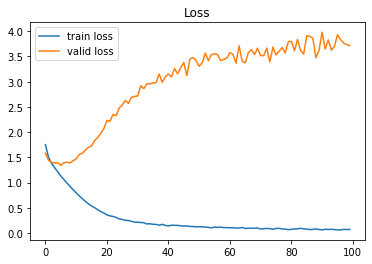

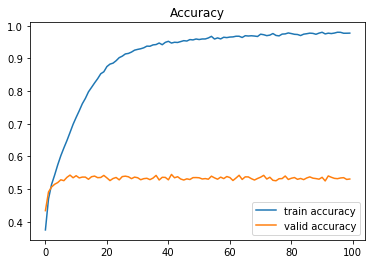

In [14]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()